# Decision Trees on Risk Analysis

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Preparing x and y for model](#section4)<br>
    - 4.1 [Splitting x and y in training and test dataset](#section401)<br>
5. [Decision Tree](#section5)<br>
    - 5.1 [Introduction to Decision Tree](#section501)<br>
    - 5.2 [Advantages and Disadvantages of Decision Tree](#section502)<br>
    - 5.3 [Decision Tree in scikit-learn](#section503)<br>
    - 5.4 [Using the Model for Prediction](#section504)<br>
6. [Model evaluation](#section6)<br>
    - 6.1 [Model Evaluation using accuracy score](#section601)<br>
    - 6.2 [Model Evaluation using confusion matrix](#section602)<br>
7. [Decision Tree with Gridsearch](#section7)<br>

## 1. Problem Statement

The goal is to __predict__ how capable are people to pay for the insurance premium using __Decision Tree__.

## 2. Data Loading and Description

- The dataset consists the information about the people for the risk analysis. various variables present in the data includes Income amount, Credit amount, Good price etc.

- The dataset comprises of __25000 observations of 122 columns__.

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [2]:
risk_train = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Work/Final_Data/Risk_train.csv")
cust_risk = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Work/Final_Data/Customer_Risk.csv") 

In [3]:
risk_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
risk_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(43), object(16)
memory usage: 23.3+ MB


In [5]:
risk_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,25000.000000,25000.000000,25000.00000,2.500000e+04,2.500000e+04,25000.00000,2.498200e+04,25000.000000,25000.000000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000
mean,114567.935080,0.079840,0.41680,1.730684e+05,5.995371e+05,27132.40224,5.389358e+05,0.020747,-16020.408240,63290.328640,...,0.00776,0.000720,0.000600,0.000480,0.007204,0.007527,0.033247,0.270964,0.263945,1.891947
std,8402.746116,0.271051,0.72237,7.455822e+05,4.019854e+05,14696.46932,3.695225e+05,0.013780,4355.492794,140857.250995,...,0.08775,0.026824,0.024488,0.021904,0.086192,0.111614,0.197661,0.940433,0.614129,1.867007
min,100002.000000,0.000000,0.00000,2.565000e+04,4.500000e+04,2052.00000,4.500000e+04,0.000533,-25182.000000,-16365.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107298.750000,0.000000,0.00000,1.125000e+05,2.700000e+05,16456.50000,2.385000e+05,0.010006,-19652.250000,-2789.250000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,114570.500000,0.000000,0.00000,1.440000e+05,5.156145e+05,24970.50000,4.500000e+05,0.018850,-15740.000000,-1226.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,121865.250000,0.000000,1.00000,2.025000e+05,8.086500e+05,34659.00000,6.795000e+05,0.028663,-12372.000000,-289.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,129076.000000,1.000000,9.00000,1.170000e+08,4.050000e+06,258025.50000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.00000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,24.000000,8.000000,25.000000


## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping columns with missing value rate higher than __threshold__ from both __Risk Train__ and __Customer Risk__ table

In [6]:
threshold=0.6

risk_train = risk_train[risk_train.columns[risk_train.isnull().sum() < threshold]]
cust_risk = cust_risk[cust_risk.columns[cust_risk.isnull().sum() < threshold]]

In [7]:
cust_risk.drop(['AMT_GOODS_PRICE','EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'],axis=1, inplace=True)

In [8]:
risk_train.drop(['ORGANIZATION_TYPE'],axis=1, inplace=True)
cust_risk.drop(['ORGANIZATION_TYPE'],axis=1, inplace=True)

In [9]:
risk_train.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE'],axis=1, inplace=True)
cust_risk.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE'],axis=1, inplace=True)

In [10]:
cust_risk.shape

(300, 52)

- Finding the total number of numerical and categorical features in train and test dataset.

In [11]:
categorical_list_train = []
numerical_list_train = []
for i in risk_train.columns.tolist():
    if risk_train[i].dtype=='object':
        categorical_list_train.append(i)
    else:
        numerical_list_train.append(i)
print('Number of categorical features in train:', str(len(categorical_list_train)))
print('Number of numerical features in train:', str(len(numerical_list_train)))

Number of categorical features in train: 6
Number of numerical features in train: 47


In [12]:
categorical_list_test = []
numerical_list_test = []
for i in cust_risk.columns.tolist():
    if cust_risk[i].dtype=='object':
        categorical_list_test.append(i)
    else:
        numerical_list_test.append(i)
print('Number of categorical features in test:', str(len(categorical_list_test)))
print('Number of numerical features in test:', str(len(numerical_list_test)))

Number of categorical features in test: 6
Number of numerical features in test: 46


- Impute the numerical features using SimpleImputer with __Median__ strategy.

In [13]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
risk_train[numerical_list_train] = SimpleImputer(strategy='median').fit_transform(risk_train[numerical_list_train])
cust_risk[numerical_list_test] = SimpleImputer(strategy='median').fit_transform(cust_risk[numerical_list_test])

- __Dummification__ of Categorical variables in train dataset.

In [14]:
risk_train_new = pd.get_dummies(risk_train, drop_first=True)
risk_train_new.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,...,0,0,1,0,0,0,0,0,0,1
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,0.003541,-16765.0,-1188.0,-1186.0,...,1,0,0,0,1,0,0,0,0,0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,...,0,0,1,0,1,0,0,0,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,0.008019,-19005.0,-3039.0,-9833.0,...,0,0,0,0,0,0,0,0,0,1
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,...,0,0,1,0,0,0,0,1,0,0


- __Dummification__ of Categorical variables in test dataset.

In [15]:
cust_risk_new = pd.get_dummies(cust_risk, drop_first=True)
cust_risk_new.head()

,Customer_id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,1900263.0,0.0,675000.0,941580.0,98874.0,0.072508,-17231.0,-2061.0,-7999.0,-774.0,...,1,0,0,0,0,1,0,0,0,0
1,1900189.0,1.0,540000.0,500490.0,59526.0,0.032561,-12073.0,-360.0,-6119.0,-4374.0,...,0,1,0,0,0,0,0,0,0,1
2,1900094.0,0.0,495000.0,691551.0,54769.5,0.007305,-8842.0,-839.0,-4283.0,-1485.0,...,0,0,0,0,0,0,0,1,0,0
3,1900207.0,2.0,450000.0,675000.0,53460.0,0.072508,-14468.0,-3525.0,-4438.0,-3473.0,...,1,0,0,0,0,0,0,0,0,1
4,1900039.0,2.0,405000.0,513040.5,61015.5,0.046220,-14342.0,-976.0,-2238.0,-1168.0,...,1,0,0,0,0,0,0,0,1,0


### Correcting the imbalanced dataset - Upsampling the minority class
- Check if our dataset is balanced or imbalanced and if any action is needed. You will find out that data are highly imbalanced, we will use resample function to upsample minority class.

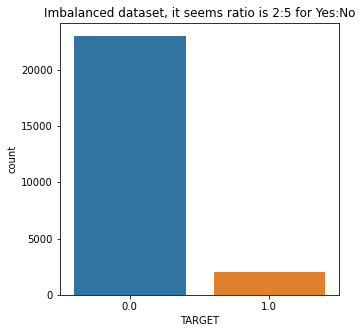

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(risk_train_new['TARGET'])
plt.title('Imbalanced dataset, it seems ratio is 2:5 for Yes:No')
plt.show()

In [17]:
from sklearn.utils import resample

minority = risk_train_new[risk_train_new.TARGET==1]
majority = risk_train_new[risk_train_new.TARGET==0]

minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
risk_train_new = pd.concat([minority_upsample, majority], axis=0)
risk_train_new = risk_train_new.sample(frac=1).reset_index(drop=True)

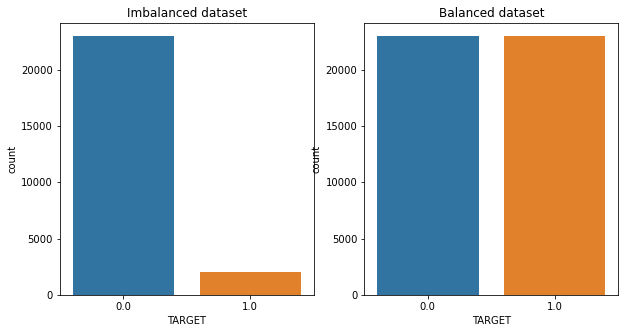

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(risk_train['TARGET'])
plt.title('Imbalanced dataset')

plt.subplot(1,2,2)
sns.countplot(risk_train_new['TARGET'])
plt.title('Balanced dataset')
plt.show()

# 4 Preparing X and y using pandas

In [19]:
X = risk_train_new.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = risk_train_new.TARGET

In [20]:
test = cust_risk_new.drop(['Customer_id'], axis=1)

### 4.1 Splitting X and y into training and test datasets.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=10)

- Shape of Train and validation dataset

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(36806, 59)
(36806,)
(9202, 59)
(9202,)


- Shape of test dataset

In [23]:
print(test.shape)

(300, 59)


# 5. Decision tree

## 5.1 Introduction to Decision tree

A decision tree is a map of the possible outcomes of a series of related choices. It allows an individual or organization to weigh possible actions against one another based on their costs, probabilities, and benefits.

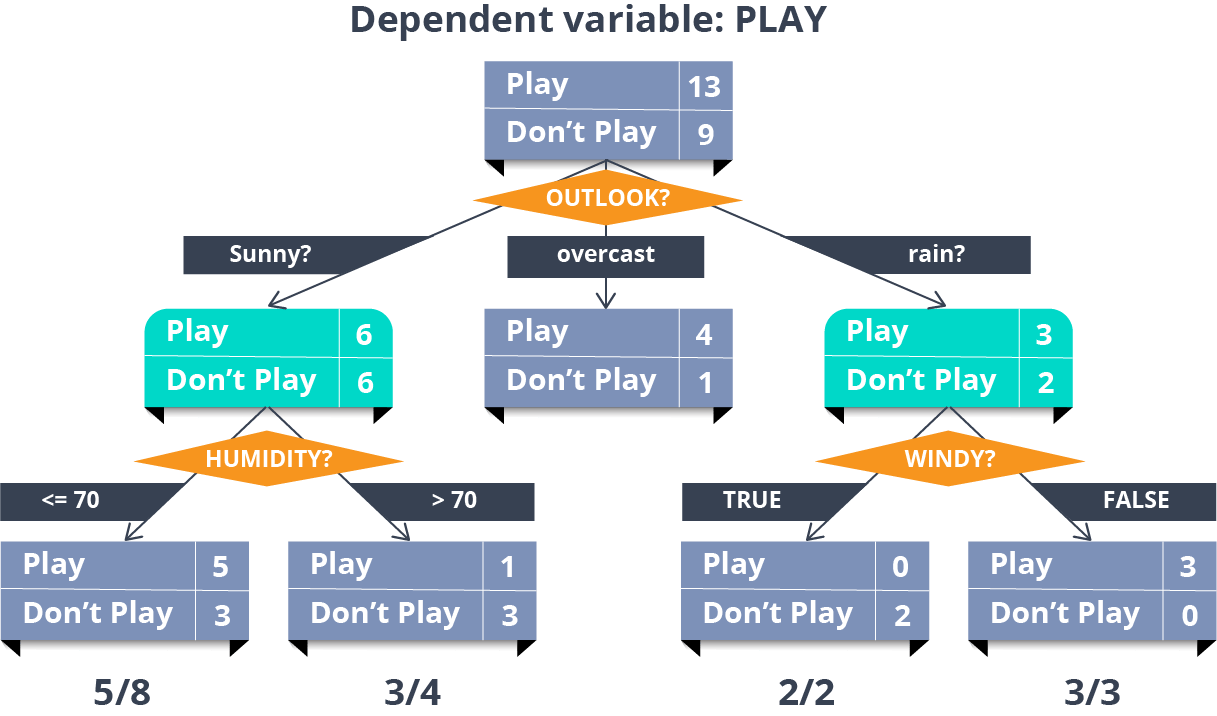

## 5.2 Advantages & Disadvantages of Decision Trees

#### Advantages

- Decision trees generate understandable rules.
- Decision trees perform classification without requiring much computation.
- Decision trees are capable of handling both continuous and categorical variables.
- Decision trees provide a clear indication of which fields are most important for prediction or classification.

#### Disadvantages

- Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.
- Decision trees are prone to errors in classification problems with many class and a relatively small number of training examples.
- Decision trees can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.

## 5.3 Decision Tree using scikit learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn import tree
    model = tree.DecisionTreeClassifier(criterion='gini')
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

    
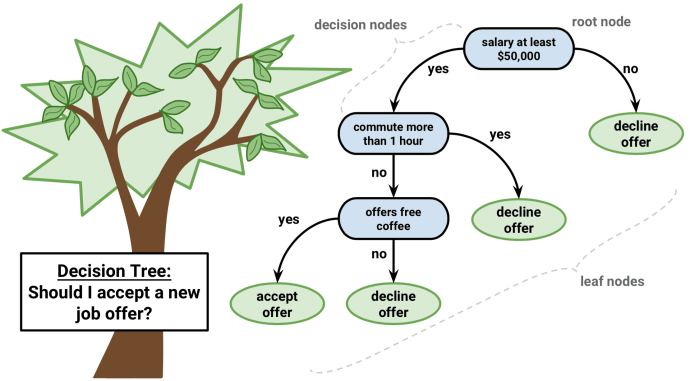

In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion = "entropy",max_depth = 5,random_state = 12)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=12)

### 5.4 Using the Model for Prediction

In [25]:
y_pred_train = model.predict(X_train) 

In [26]:
y_pred_test = model.predict(X_valid)                          # make predictions on the validation

## 5. Model evaluation 

- __Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
- We will use __accuracy score  and confusion matrix__ for evaluation.

### 5.1 Model Evaluation using __accuracy_score__

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_valid,y_pred_test))

Accuracy score for test data is: 0.6304064333840469


### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>

Below is a diagram showing a general confusion matrix.

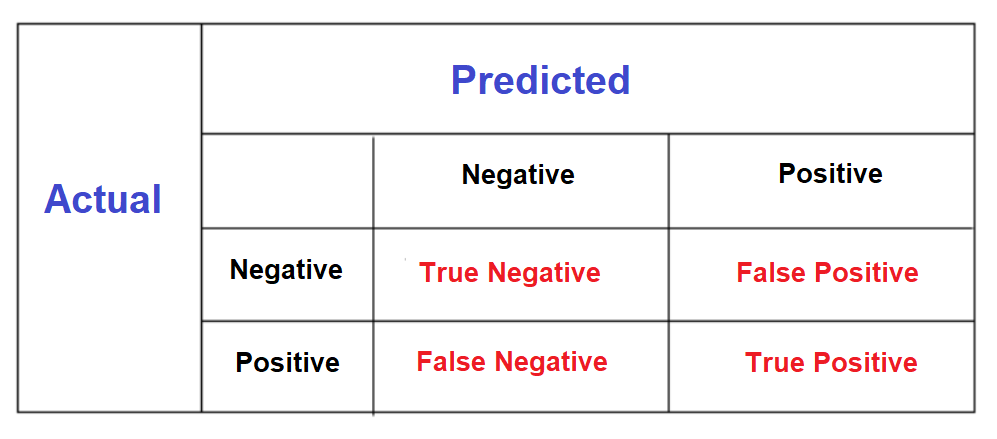

Text(0.5, 15.0, 'Predicted label')

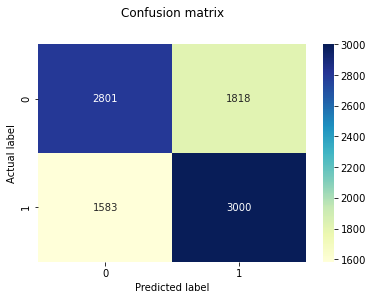

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_test)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [30]:
# precision tp / (tp + fp)
precision = precision_score(y_valid, y_pred_test)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_valid, y_pred_test)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_valid, y_pred_test)
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_valid, y_pred_test)
print('ROC AUC: %f' % auc)

Precision: 0.622665
Recall: 0.654593
F1 score: 0.638230
ROC AUC: 0.630501


## ROC AUC Curve

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

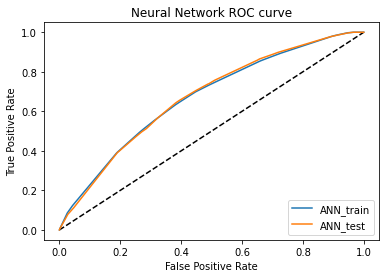

In [31]:
from sklearn.metrics import roc_curve
y_pred_train = model.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train,tpr_train, label='ANN_train')
plt.plot(fpr,tpr, label='ANN_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC curve')
plt.legend(loc = 'lower right')
plt.show()

- Prediction of Model on test data

In [32]:
prediction = model.predict(test)

## Finding feature Importance using probabilities and plot them using bar graph

<AxesSubplot:>

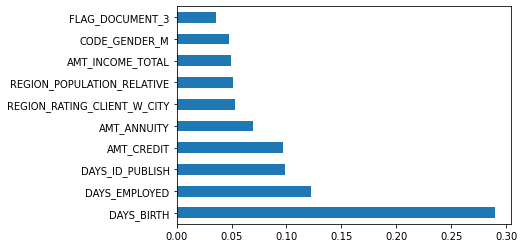

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=test.columns)
feat_importances.nlargest(10).plot(kind='barh')

## 6. Decision Tree with Gridsearch
<br/>
Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.
To know more about the different parameters in decision tree classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [35]:
max_depth = [1,5,10, 15, 20,50,100]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10, 15, 20,50,100], 'min_samples_split': [5,10,100,500]}]
clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=5)
clf.fit(X_train, y_train)
scores_model_train = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

In [36]:
max_depth = [1,5,10, 15, 20,50,100]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10, 15, 20,50,100], 'min_samples_split': [5,10,100,500]}]
clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=5)
clf.fit(X_valid, y_valid)
scores_model_valid = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

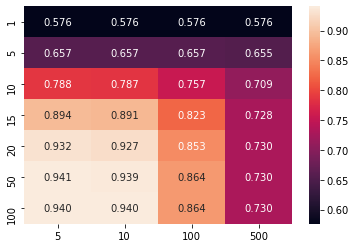

In [37]:
grid_train = pd.DataFrame(scores_model_train ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(grid_train, annot=True, fmt='.3f')

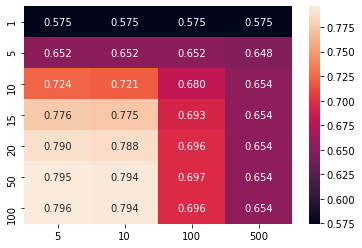

In [38]:
grid_valid = pd.DataFrame(scores_model_valid ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(grid_valid, annot=True, fmt='.3f')

In [39]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion = "gini",max_depth = 10 , min_samples_split= 5)
clf.fit(X_train,y_train)
pred_y = clf.predict(X_valid)
accuracy= accuracy_score(y_valid, pred_y)
print('\n****Test accuracy score for max_depth = 10 and min_samples_split = 5 is %f' % (accuracy))


****Test accuracy score for max_depth = 10 and min_samples_split = 5 is 0.725277


In [40]:
# precision tp / (tp + fp)
precision = precision_score(y_valid, pred_y)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_valid, pred_y)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_valid, pred_y)
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_valid, pred_y)
print('ROC AUC: %f' % auc)

Precision: 0.688705
Recall: 0.818241
F1 score: 0.747906
ROC AUC: 0.725639


## ROC AUC Curve

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

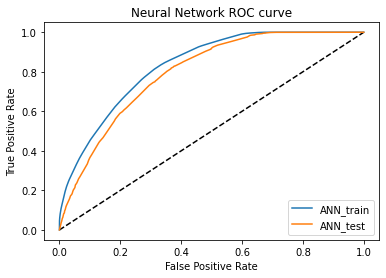

In [41]:
from sklearn.metrics import roc_curve
y_pred_train = clf.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
y_pred_proba = clf.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train,tpr_train, label='ANN_train')
plt.plot(fpr,tpr, label='ANN_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC curve')
plt.legend(loc = 'lower right')
plt.show()

### Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

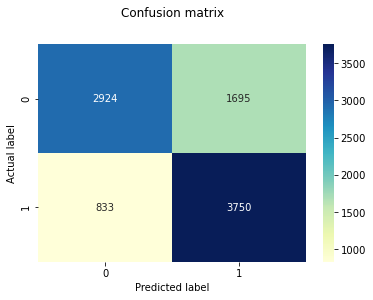

In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
### Confusion Matrix
cm2 = confusion_matrix(y_valid, pred_y)
p = sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

You can see 2994 + 3600 = __6594 correct predictions__ & 1595 + 1013 = __2608 false predictions__.

__Observations:__

- __With gridsearch__ *accuracy_score* __increased__ from __0.630 to 0.725__ and the __number of correct predictions increased from 5801 to 6674__ and number of false predictions __decreased__ from __3401 to 2528__. 

### Prediction

In [48]:
prediction = clf.predict_proba(test)[:,1]

In [50]:
prediction

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.75570033, 0.59589041, 0.        , 0.        , 0.07216495,
       0.        , 0.59589041, 0.        , 0.60523187, 0.14772727,
       0.        , 0.        , 0.10734463, 0.32758621, 0.        ,
       0.87058824, 0.76605868, 0.        , 0.        , 0.59589041,
       0.61993769, 0.20441989, 0.3176865 , 0.        , 0.72641509,
       0.1       , 0.        , 0.        , 0.86507937, 0.72015161,
       0.51224105, 0.49044586, 0.67885375, 0.72641509, 0.5518591 ,
       0.30637636, 0.60523187, 0.51224105, 0.84745763, 0.33701657,
       0.        , 0.625     , 0.31012658, 0.51224105, 0.07222222,
       0.48175182, 0.60523187, 0.        , 0.72015161, 0.67885375,
       0.3176865 , 0.72641509, 0.72015161, 0.3220339 , 0.00928793,
       0.72641509, 0.        , 0.        , 0.60523187, 0.00928793,
       0.51224105, 0.62913097, 0.67885375, 0.41670254, 0.        ,
       0.50909091, 0.        , 0.67885375, 0.76605868, 0.55646

In [57]:
cust_risk['RISK_PROBABILITY'] = prediction

In [58]:
cust_risk

,Customer_id,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_FAMILY_STATUS,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,RISK_PROBABILITY
0,1900263.0,Cash loans,F,N,N,0.0,675000.0,941580.0,98874.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1900189.0,Cash loans,F,N,Y,1.0,540000.0,500490.0,59526.0,Separated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1900094.0,Cash loans,M,Y,Y,0.0,495000.0,691551.0,54769.5,Civil marriage,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1900207.0,Cash loans,M,Y,Y,2.0,450000.0,675000.0,53460.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1900039.0,Cash loans,M,Y,Y,2.0,405000.0,513040.5,61015.5,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1900142.0,Cash loans,F,Y,Y,0.0,63000.0,112500.0,12244.5,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317687
296,1900196.0,Cash loans,F,N,N,0.0,63000.0,83538.0,6592.5,Single / not married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
297,1900240.0,Cash loans,F,N,N,0.0,58500.0,58500.0,6939.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
298,1900081.0,Cash loans,M,N,Y,0.0,45000.0,526491.0,24525.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608247


In [59]:
Risk_Amount = cust_risk.AMT_CREDIT * cust_risk.RISK_PROBABILITY

In [60]:
cust_risk['AMT_RISK'] = Risk_Amount

In [64]:
cust_risk.head(50)

,Customer_id,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_FAMILY_STATUS,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,RISK_PROBABILITY,AMT_RISK
0,1900263.0,Cash loans,F,N,N,0.0,675000.0,941580.0,98874.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1900189.0,Cash loans,F,N,Y,1.0,540000.0,500490.0,59526.0,Separated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1900094.0,Cash loans,M,Y,Y,0.0,495000.0,691551.0,54769.5,Civil marriage,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1900207.0,Cash loans,M,Y,Y,2.0,450000.0,675000.0,53460.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1900039.0,Cash loans,M,Y,Y,2.0,405000.0,513040.5,61015.5,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
5,1900030.0,Cash loans,F,Y,Y,0.0,360000.0,945000.0,34074.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.755700,714136.807818
6,1900052.0,Cash loans,M,N,N,0.0,360000.0,1024740.0,43546.5,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595890,610632.739726
7,1900105.0,Cash loans,M,Y,Y,1.0,360000.0,1024740.0,52452.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8,1900198.0,Cash loans,M,Y,N,0.0,360000.0,900000.0,45954.0,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
9,1900271.0,Cash loans,M,Y,Y,0.0,360000.0,225000.0,10822.5,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072165,16237.113402


__Observations:__

- In our test dataset, we have calculated the probability of risk associated with each person(RISK_PROBABILITY) and Amount of risk(in $) with each person.

## Finding feature Importance using probabilities and plot them using bar graph

<AxesSubplot:>

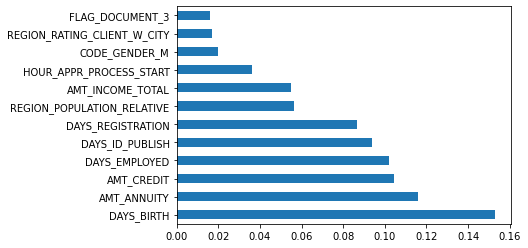

In [44]:
feat_importances = pd.Series(clf.feature_importances_, index=test.columns)
feat_importances.nlargest(12).plot(kind='barh')

__Observations:__

- The few most important features which helped us to predict the models are-
  - __1. Client's age at the time of application.__
  - __2. No of days before the application the client started current employement.__
  - __3. Annuity of the credit card bureau.__
  - __4. How many days before the application did client change the identity document with which he applied for the loan.__
  - __5. Credit amount of the loan.__